In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from scipy import stats
from scipy.stats import norm, kurtosis, skew, normaltest
from IPython.display import display, Math, Latex

In [2]:
data = pd.read_csv("./../data/weight-height.csv")

In [3]:
titanic = pd.read_csv('./../data/titanic.csv')

In [4]:
ages = titanic['Age'].dropna()
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ages_mean = titanic['Age'].mean()
ages_median = titanic['Age'].median()
ages_std = np.std(titanic['Age'])

>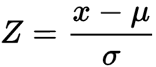

>x is a score\
>σ is the population standard deviation\
>μ is the population mean

In [6]:
def z_score(value, mean, std):
    return (value - mean) / std

In [7]:
z_scores=(ages-ages_mean)/ages_std
# titanic['z_scores']=(ages-ages_mean)/ages_std
titanic['z_scores'] = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std() #std(ddof=0)

In [8]:
titanic['z_scores']

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: z_scores, Length: 891, dtype: float64

In [9]:
titanic[(titanic.z_scores.between(0,1)==True)].shape[0]

215

In [10]:
postive_1st_sd = len(titanic[titanic['z_scores'].between(0, 1)==True])
postive_2st_sd = len(titanic[titanic['z_scores'].between(0, 2)==True])
postive_3st_sd = len(titanic[titanic['z_scores'].between(0, 3)==True])

negative_1st_sd = len(titanic[titanic['z_scores'].between(0, -1)==True])
negative_2st_sd = len(titanic[titanic['z_scores'].between(0, -2)==True])
negative_3st_sd = len(titanic[titanic['z_scores'].between(0, -3)==True])

first_sd = len(titanic[titanic['z_scores'].between(-1, 1)==True])
second_sd = len(titanic[titanic['z_scores'].between(-2, 3)==True])
third_sd = len(titanic[titanic['z_scores'].between(-3, 3)==True])


first_sd_p  = first_sd/len(titanic)*100
second_sd_p  = second_sd/len(titanic)*100
third_sd_p  = third_sd/len(titanic)*100

In [11]:
len(titanic[titanic['z_scores'].between(0,1)])

215

In [12]:
postive_1st_sd

215

In [13]:
postive_2st_sd

302

In [14]:
postive_3st_sd

328

## Measuring Skewness

The rule of thumb seems to be:

A skewness between -0.5 and 0.5 means that the data are pretty symmetrical
A skewness between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed) means that the data are moderately skewed.
A skewness smaller than -1 (negatively skewed) or bigger than 1 (positively skewed) means that the data are highly skewed.

In [15]:
skew(ages)

0.3882898514698657

## Measuring Kurtosis

In [16]:
kurtosis(ages)

0.16863657224286044

In [17]:
normaltest(ages)

NormaltestResult(statistic=18.105032952089758, pvalue=0.00011709599657350757)